**Implementation of Radius Nearest Neighbors calssifier from scratch**

Import libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import dataPrep as dp

RNN class

In [16]:

class Radius_Nearest_Neighbors_Classifier() : 
     
    def __init__( self, radius ) :
        self.radius = radius
         
    # Function to store training set
    def fit(self,X_train,Y_train) :
        self.X_train = X_train
        self.Y_train = Y_train
        # no_of_training_examples, no_of_features
        self.samples, self.features = X_train.shape

    def find_neighbors(self,x) :
        # list to store training examples which will fall in the circle
        inside = []
        for i in range( self.samples ) :
            distance = self.euclidean_distance( x, self.X_train[i] )
            if distance <= self.radius :
                inside.append( self.Y_train.iloc[i] )

        inside_array = np.array( inside )
                 
        return inside_array

    def euclidean_distance( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )

    def predict( self, X_test ) :
        self.X_test = X_test
        # no_of_test_examples, no_of_features
        self.samples_test, self.features_test = X_test.shape
        # initialize Y_predict
        Y_predict = np.zeros(self.samples_test)
        for i in range(self.samples_test) :
            x = self.X_test[i]
            # find the number of neighbors within a fixed 
            # radius r of current training example
            neighbors = self.find_neighbors( x )
            # most frequent class in the circle drawn by current 
            # training example of fixed radius r
            Y_predict[i] = mode( neighbors )[0][0]
             
        return np.array(Y_predict)




Import data

In [17]:
prostate_cancer_data = pd.read_csv('Prostate_Cancer.csv')
prostate_cancer_data

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


Drop id col as there's no need to it 

In [18]:

prostate_cancer_data.drop(['id'],axis=1,inplace=True)
prostate_cancer_data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


Encode diagnosis result col to zeroes & ones

In [19]:
encoder=LabelEncoder()
prostate_cancer_data['diagnosis_result'] = encoder.fit_transform(prostate_cancer_data['diagnosis_result'])

Imputation of outliers by mean

In [20]:
dp.outliers_imputation(prostate_cancer_data,'perimeter','mean')
dp.outliers_imputation(prostate_cancer_data,'smoothness','mean')
dp.outliers_imputation(prostate_cancer_data,'compactness','mean')
dp.outliers_imputation(prostate_cancer_data,'symmetry','mean')
dp.outliers_imputation(prostate_cancer_data,'fractal_dimension','mean')

Select X data

In [21]:
X_data=prostate_cancer_data.drop(['diagnosis_result'],axis=1).values
pd.DataFrame(X_data)

,0,1,2,3,4,5,6,7
0,23.0,12.0,151.0,954.0,0.102730,0.126700,0.242,0.07900
1,9.0,13.0,133.0,1326.0,0.102730,0.079000,0.181,0.05700
2,21.0,27.0,130.0,1203.0,0.125000,0.160000,0.207,0.06000
3,14.0,16.0,78.0,386.0,0.070000,0.125187,0.260,0.06469
4,9.0,19.0,135.0,1297.0,0.101925,0.133000,0.181,0.05900
...,...,...,...,...,...,...,...,...
95,23.0,16.0,132.0,1264.0,0.091000,0.131000,0.210,0.05600
96,22.0,14.0,78.0,451.0,0.105000,0.071000,0.190,0.06600
97,19.0,27.0,62.0,295.0,0.102000,0.053000,0.135,0.06900
98,21.0,24.0,74.0,413.0,0.090000,0.075000,0.162,0.06600


Select Y data

In [22]:
Y_data = prostate_cancer_data['diagnosis_result']
Y_data

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result, Length: 100, dtype: int32

Split data into test & train

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=0)


In [24]:
model = Radius_Nearest_Neighbors_Classifier( radius = 53 )
    
model.fit( X_train, Y_train )
     

In [25]:
Y_pred = model.predict(X_test)

C:\Users\Aalan\AppData\Local\Temp\ipykernel_12312\1909444267.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode( neighbors )[0][0]


In [26]:
correctly_classified = 0
Y_test_reset = Y_test.reset_index(drop=True)
Y_pred_reset = pd.Series(model.predict(X_test))
count = 0
    
for count in range( min(np.size(Y_test_reset),np.size(Y_pred_reset))) :
        
    if Y_test_reset[count] == Y_pred_reset[count] :
            
        correctly_classified = correctly_classified + 1
        
    count = count + 1

C:\Users\Aalan\AppData\Local\Temp\ipykernel_12312\1909444267.py:41: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode( neighbors )[0][0]


Calculate accuracy

In [27]:
print("Accuracy : ", ( correctly_classified / count ) * 100 )

Accuracy :  95.0


Visulaization

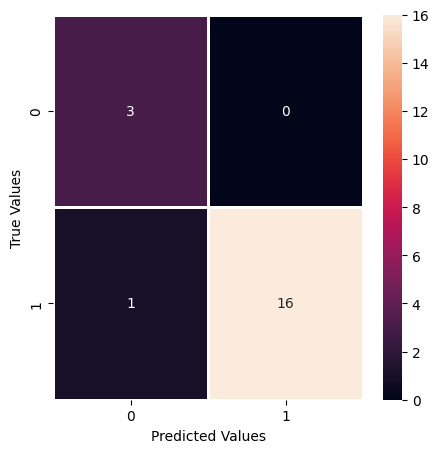

In [28]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test_reset,Y_pred_reset)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=1,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()